# Credit Card Customer Segmentation

<b>Background:</b> 

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 

<b>Objective:</b> 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

 

<b>Key Questions:</b>

- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?
 

<b>Data Description:</b> 

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer
 

<b>Steps to follow:</b> 

1) Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

2) Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

3) Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

4) Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

5) Calculate average silhouette score for both methods. (5 marks)

6) Compare K-means clusters with Hierarchical clusters. (5 marks)

7) Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)


In [45]:
# import standard libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [25]:
#import data and view header
ccData = pd.read_excel('Credit Card Customer Data.xlsx')
ccData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [75]:
#view properties of data
ccData.shape, ccData.info(), display(ccData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


((660, 7), None, None)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


# PLACEHOLDER FOR ANALYSIS

In [40]:
# Sl_No and customer key are identifiers and add no value to recognizing patterns, create a new matrix without those columns
ccDataVars = ccData.drop(['Sl_No', 'Customer Key'], axis = 1)

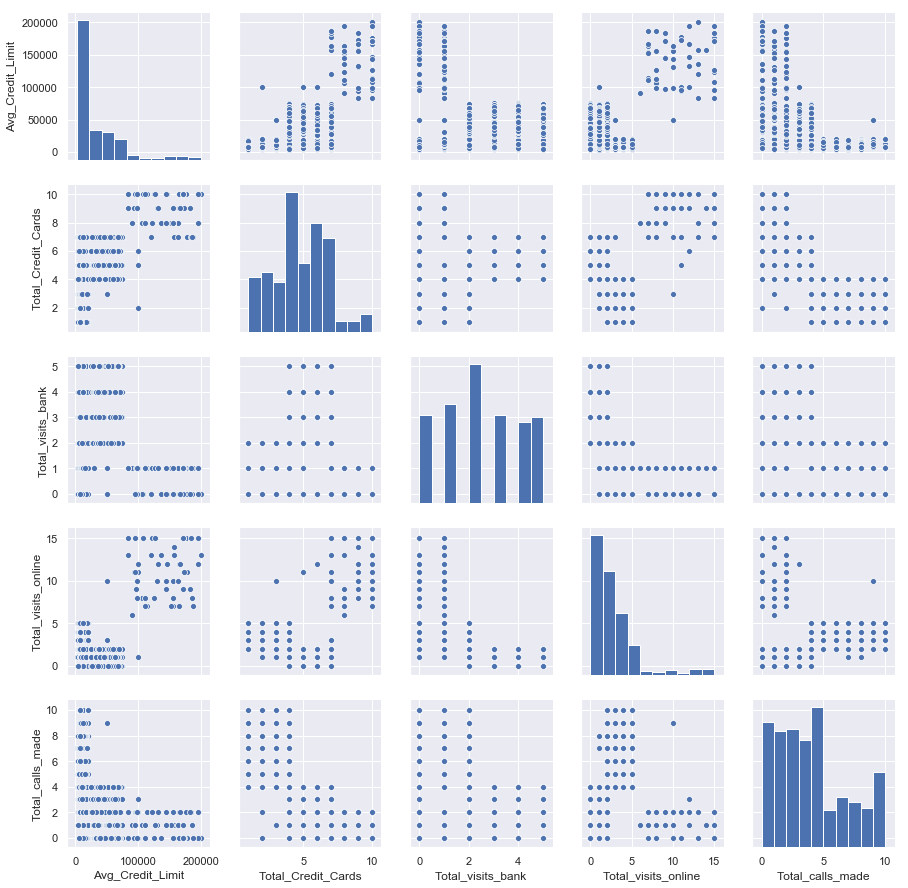

In [41]:
sns.pairplot(ccDataVars)

## K Means Clustering

In [38]:
#scale data using z score
from scipy.stats import zscore
ccDataScaled = ccDataVars.apply(zscore)
ccDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [43]:
#import KMeans from sklearn
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(ccDataScaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,2040.989816
2,3,933.043749
3,4,780.773690
4,5,717.511656
5,6,661.334261
6,7,606.650977
7,8,575.506858
8,9,540.612780
9,10,517.909347


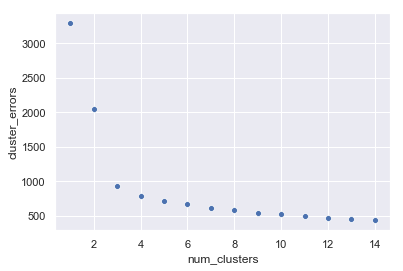

In [51]:
sns.scatterplot(x = clusters_df['num_clusters'], y = clusters_df['cluster_errors'])
plt.show()

In [55]:
cluster_final = KMeans(n_clusters = 3, n_init= 5)
cluster_final.fit(ccDataScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Hierarchical Clustering

In [58]:
#import libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist

In [62]:
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

In [63]:
agglo.fit(ccDataScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [71]:
link = ['ward', 'complete', 'average', 'single']
df = pd.DataFrame(columns = ['Method', 'Cophenetic'])

df.head()

,Method,Cophenetic


In [76]:
for i in link:
    Z = linkage(ccDataScaled, metric='euclidean', method=i)
    c, coph = cophenet(Z, pdist(ccDataScaled))
    print(c)

0.7415691585186225
0.8612652519314926
0.8977080867389373
0.7391220243806551


In [ ]:
## Cross validation?

## Sillhouette Score and Comparison Between K Means and Hierarchical Clustering